In [ ]:
!pip install tensorflow keras matplotlib scikit-learn

Mounted at /content/drive
Found 4655 images belonging to 10 classes.
Found 997 images belonging to 10 classes.
Found 998 images belonging to 10 classes.


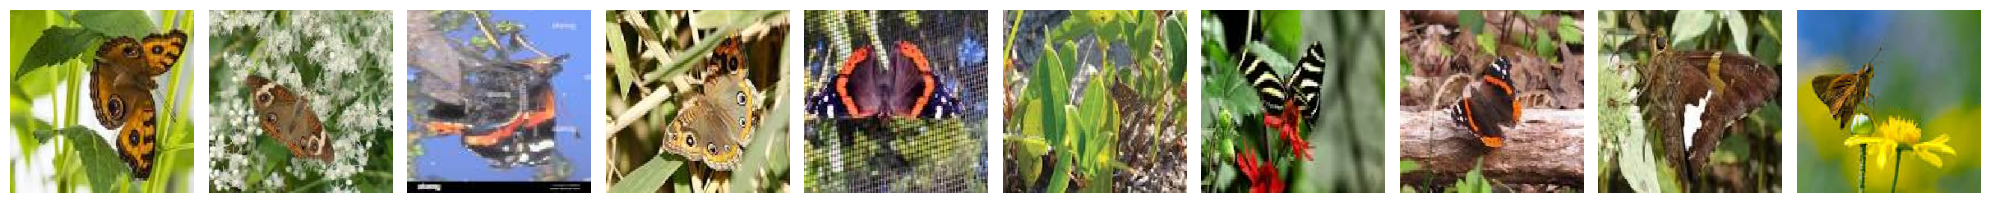

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

base_dir = '/content/drive/My Drive/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Get a batch of images and labels
imgs, labels = next(train_generator)  # Get a batch of images and labels

# Plot the images
plotImages(imgs)

# Print the labels
print(labels)


In [ ]:
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import time

In [ ]:
def create_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(train_generator.class_indices)

ResNet50 Model

In [ ]:
# ResNet50 Model Setup
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model = create_model(resnet_base, num_classes)

checkpoint_resnet = ModelCheckpoint('resnet_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train ResNet50 Model
start_time = time.time()
resnet_history = resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,  # Ensure it runs for all 50 epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint_resnet]  # No EarlyStopping
)
resnet_training_time = time.time() - start_time
print("ResNet50 Training Time:", resnet_training_time)


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/50
145/145 [==============================] - 92s 400ms/step - loss: 1.4714 - accuracy: 0.5682 - val_loss: 2.4657 - val_accuracy: 0.1200
Epoch 2/50
145/145 [==============================] - 54s 371ms/step - loss: 0.9177 - accuracy: 0.7060 - val_loss: 2.2972 - val_accuracy: 0.1512
Epoch 3/50
145/145 [==============================] - 53s 365ms/step - loss: 0.8010 - accuracy: 0.7426 - val_loss: 2.5125 - val_accuracy: 0.1220
Epoch 4/50
145/145 [==============================] - 54s 371ms/step - loss: 0.6505 - accuracy: 0.7952 - val_loss: 2.3977 - val_accuracy: 0.1663
Epoch 5/50
145/145 [==============================] - 54s 372ms/step - loss: 0.5119 - accuracy: 0.8328 - val_loss: 2.1710 - val_accuracy: 0.2470
Epoch 6/50
145/145 [==============================] - 55s 376ms/step - loss: 0.4069 - accuracy: 0.8642 - val_loss: 2.0509 - val_accuracy: 0.4163
Epoch 7/50
145/145 [==============================] - 55s 376ms/s

DenseNet121 Model

In [ ]:
# DenseNet121 Model Setup
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model = create_model(densenet_base, num_classes)

checkpoint_densenet = ModelCheckpoint('densenet_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train DenseNet121 Model
start_time = time.time()
densenet_history = densenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,  # Ensure it runs for all 50 epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint_densenet]
)
densenet_training_time = time.time() - start_time
print("DenseNet121 Training Time:", densenet_training_time)


29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/50
145/145 [==============================] - 125s 431ms/step - loss: 1.1959 - accuracy: 0.6338 - val_loss: 1.6018 - val_accuracy: 0.6653
Epoch 2/50
145/145 [==============================] - 52s 360ms/step - loss: 0.8414 - accuracy: 0.7257 - val_loss: 2.6292 - val_accuracy: 0.5212
Epoch 3/50
145/145 [==============================] - 53s 362ms/step - loss: 0.7011 - accuracy: 0.7776 - val_loss: 2.1769 - val_accuracy: 0.5706
Epoch 4/50
145/145 [==============================] - 53s 368ms/step - loss: 0.5854 - accuracy: 0.8083 - val_loss: 1.3618 - val_accuracy: 0.6704
Epoch 5/50
145/145 [==============================] - 54s 369ms/step - loss: 0.5481 - accuracy: 0.8231 - val_loss: 0.7639 - val_accuracy: 0.7681
Epoch 6/50
145/145 [==============================] - 52s 362ms/step - loss: 0.4379 - accuracy: 0.8583 - val_loss: 1.9187 - val_accuracy: 0.5927
Epoch 7/50
145/145 [==============================] - 52s 361ms/

MobileNetV3 Model

In [ ]:
# MobileNetV3Small Model Setup
mobilenet_base = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_model = create_model(mobilenet_base, num_classes)

# Only use ModelCheckpoint, remove EarlyStopping
checkpoint_mobilenet = ModelCheckpoint('mobilenet_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train MobileNetV3Small Model
start_time = time.time()
mobilenet_history = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,  # Ensure it runs for all 50 epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint_mobilenet]  # No EarlyStopping
)
mobilenet_training_time = time.time() - start_time
print("MobileNetV3Small Training Time:", mobilenet_training_time)

4334752/4334752 [==============================] - 0s 0us/step
Epoch 1/50
145/145 [==============================] - ETA: 0s - loss: 1.0845 - accuracy: 0.6472

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


145/145 [==============================] - 1167s 8s/step - loss: 1.0845 - accuracy: 0.6472 - val_loss: 2.4835 - val_accuracy: 0.1512
Epoch 2/50
145/145 [==============================] - 17s 115ms/step - loss: 0.6108 - accuracy: 0.7997 - val_loss: 2.5216 - val_accuracy: 0.1190
Epoch 3/50
145/145 [==============================] - 18s 123ms/step - loss: 0.4072 - accuracy: 0.8689 - val_loss: 2.7659 - val_accuracy: 0.1089
Epoch 4/50
145/145 [==============================] - 16s 113ms/step - loss: 0.2816 - accuracy: 0.9048 - val_loss: 2.7147 - val_accuracy: 0.1200
Epoch 5/50
145/145 [==============================] - 17s 117ms/step - loss: 0.2372 - accuracy: 0.9256 - val_loss: 2.9482 - val_accuracy: 0.1200
Epoch 6/50
145/145 [==============================] - 17s 118ms/step - loss: 0.1923 - accuracy: 0.9368 - val_loss: 3.3611 - val_accuracy: 0.1190
Epoch 7/50
145/145 [==============================] - 17s 115ms/step - loss: 0.1173 - accuracy: 0.9650 - val_loss: 2.8120 - val_accuracy: 0.06

Evaluate The Models

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
import seaborn as sns

def evaluate_model(model, test_generator):
    test_generator.reset()
    predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    cm = confusion_matrix(true_classes, predicted_classes)

    return report, cm, predictions, true_classes

# Load the best model weights
resnet_model.load_weights('resnet_model.h5')
densenet_model.load_weights('densenet_model.h5')
mobilenet_model.load_weights('mobilenet_model.h5')

# Evaluate ResNet50
resnet_report, resnet_cm, resnet_predictions, resnet_true_classes = evaluate_model(resnet_model, test_generator)

# Evaluate DenseNet121
densenet_report, densenet_cm, densenet_predictions, densenet_true_classes = evaluate_model(densenet_model, test_generator)

# Evaluate MobileNetV3Small
mobilenet_report, mobilenet_cm, mobilenet_predictions, mobilenet_true_classes = evaluate_model(mobilenet_model, test_generator)


32/32 [==============================] - 5s 119ms/step


Calculate mAP

In [ ]:
def calculate_map(true_labels, predictions, num_classes):
    ap_list = []
    for i in range(num_classes):
        ap = average_precision_score((true_labels == i).astype(int), predictions[:, i])
        ap_list.append(ap)
    return np.mean(ap_list)

# Calculate mAP for ResNet50
resnet_map = calculate_map(resnet_true_classes, resnet_predictions, num_classes)
print("ResNet50 mAP:", resnet_map)

# Calculate mAP for DenseNet121
densenet_map = calculate_map(densenet_true_classes, densenet_predictions, num_classes)
print("DenseNet121 mAP:", densenet_map)

# Calculate mAP for MobileNetV3Small
mobilenet_map = calculate_map(mobilenet_true_classes, mobilenet_predictions, num_classes)
print("MobileNetV3Small mAP:", mobilenet_map)


ResNet50 mAP: 0.09987129780588663
DenseNet121 mAP: 0.1005891072615589
MobileNetV3Small mAP: 0.09947849512342863


Visualise Confusion Matrices

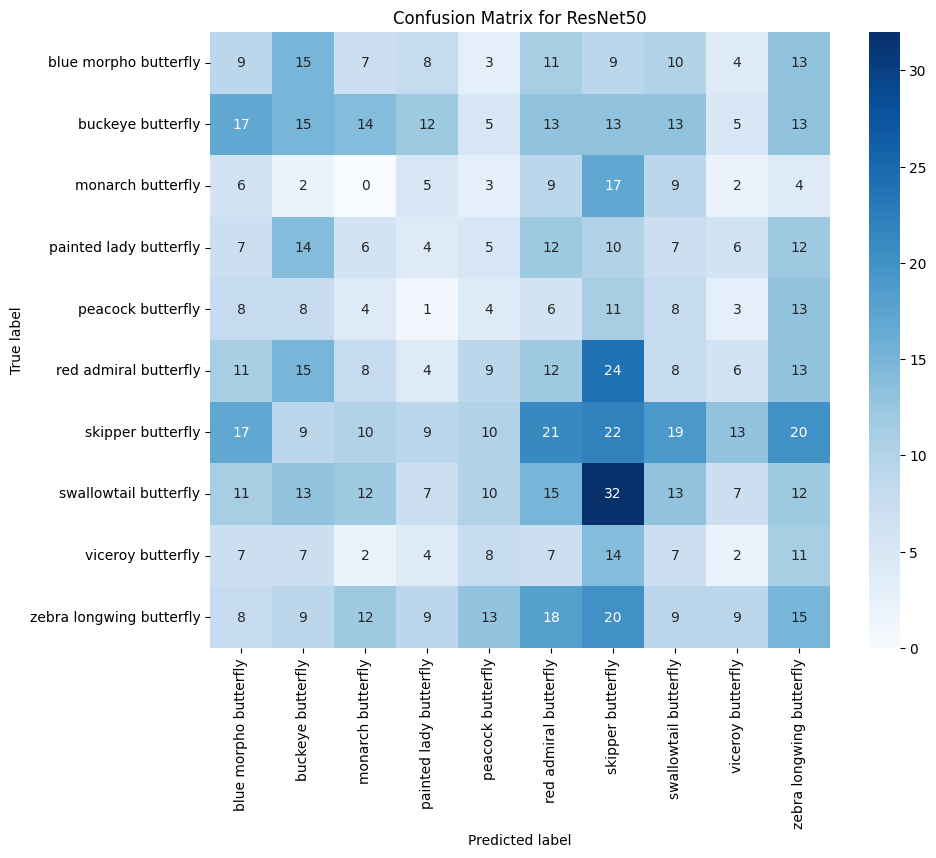

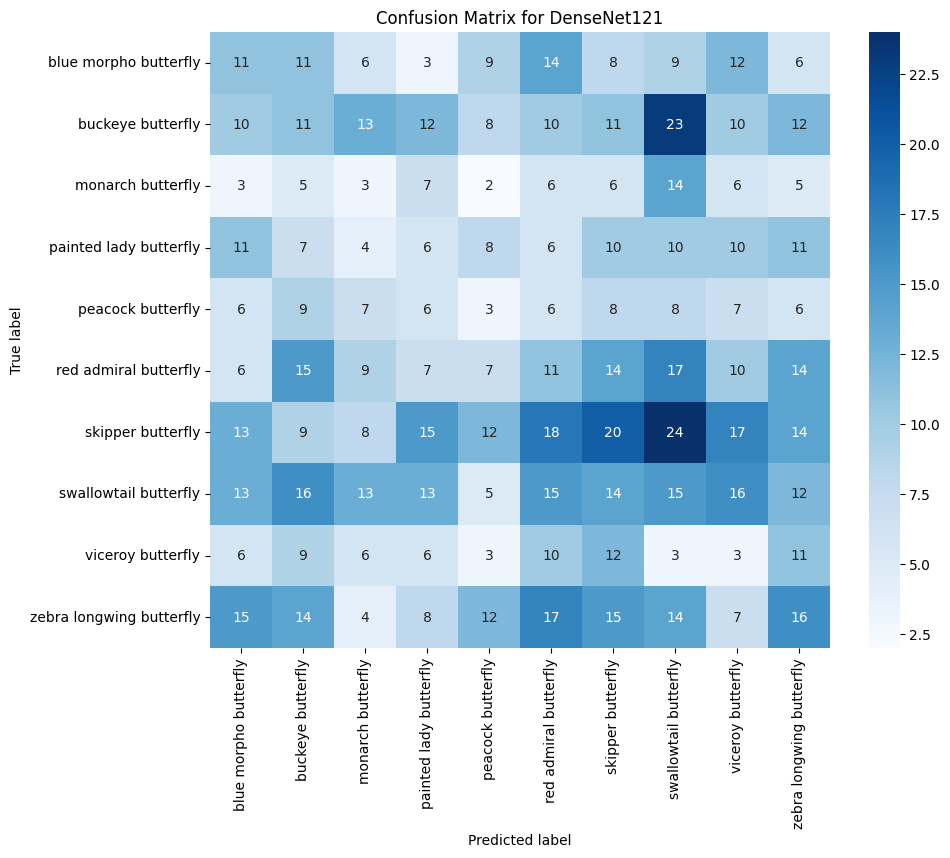

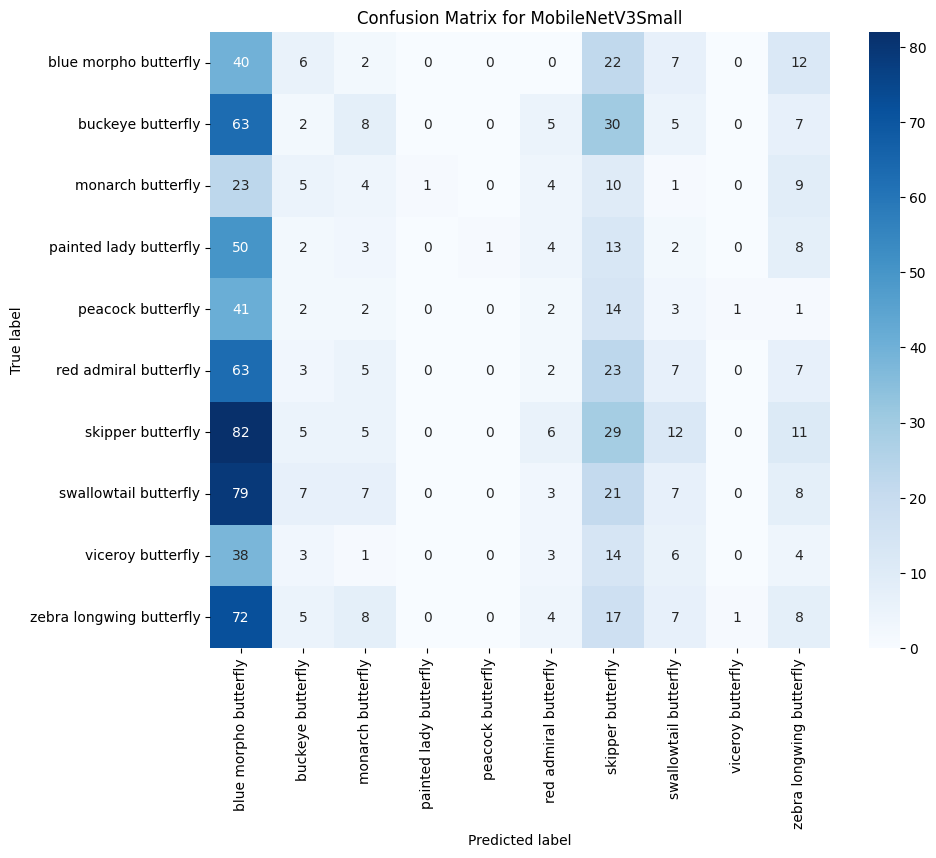

In [ ]:
def plot_confusion_matrix(cm, class_names, model_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot for ResNet50
plot_confusion_matrix(resnet_cm, list(test_generator.class_indices.keys()), 'ResNet50')

# Plot for DenseNet121
plot_confusion_matrix(densenet_cm, list(test_generator.class_indices.keys()), 'DenseNet121')

# Plot for MobileNetV3Small
plot_confusion_matrix(mobilenet_cm, list(test_generator.class_indices.keys()), 'MobileNetV3Small')


Plot Training History

# Confusion Matrix Analysis


> ResNet50

**Insights:**

* Correct Classifications:
Highest for "swallowtail butterfly" (32).

* Misclassifications:
Major confusion with "skipper butterfly" and "viceroy butterfly".

**Analysis:**

High Errors:
* "Skipper butterflies" misclassified as "swallowtail butterflies" (19).
"Monarch butterflies" misclassified as "skipper butterflies" (17).

* Best Performance:
"Swallowtail butterfly" and "skipper butterfly".


> DenseNet121

**Insights:**

* Correct Classifications:
Highest for "skipper butterfly" (24).

* Misclassifications:
Major confusion with "swallowtail butterfly" and "buckeye butterfly".


**Analysis:**

* High Errors:
"Swallowtail butterflies" misclassified as "buckeye butterflies" (16). "Skipper butterflies" misclassified as "swallowtail butterflies" (18).

* Best Performance:
"Skipper butterfly" and "swallowtail butterfly".

> MobileNetV3Small

**Insights:**

* Correct Classifications: Highest for "blue morpho butterfly" (40).

* Misclassifications: Major confusion with "skipper butterfly" and "buckeye butterfly"

**Analysis:**

* High Errors:
“Skipper butterflies" misclassified as "blue morpho butterflies" (82).
"Zebra longwing butterflies" misclassified as "blue morpho butterflies" (72).

* Best Performance: "Blue morpho" and "peacock butterflies."








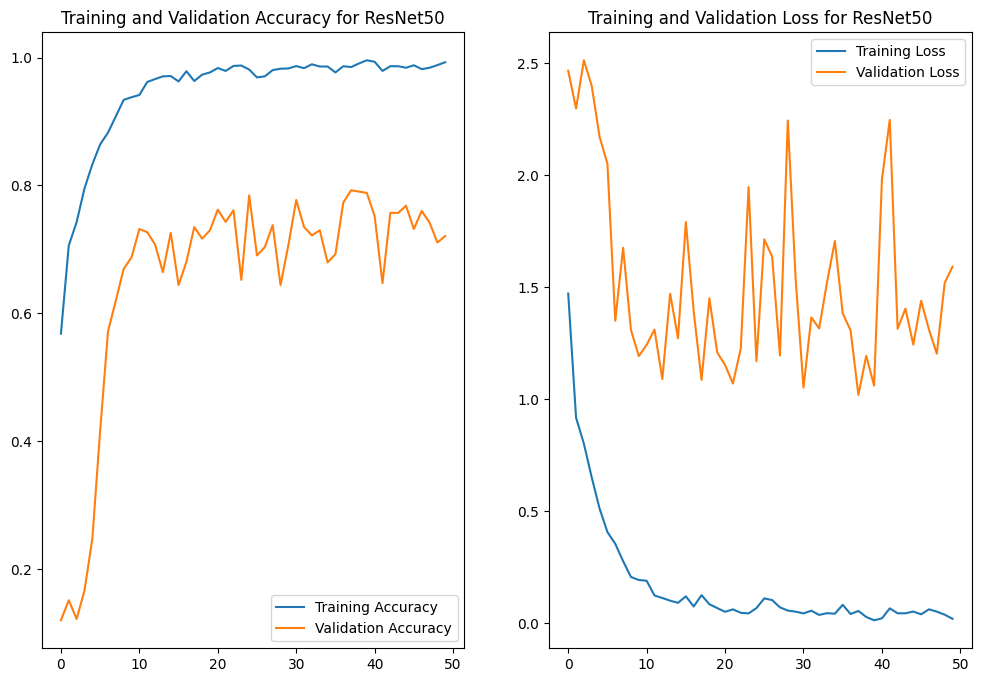

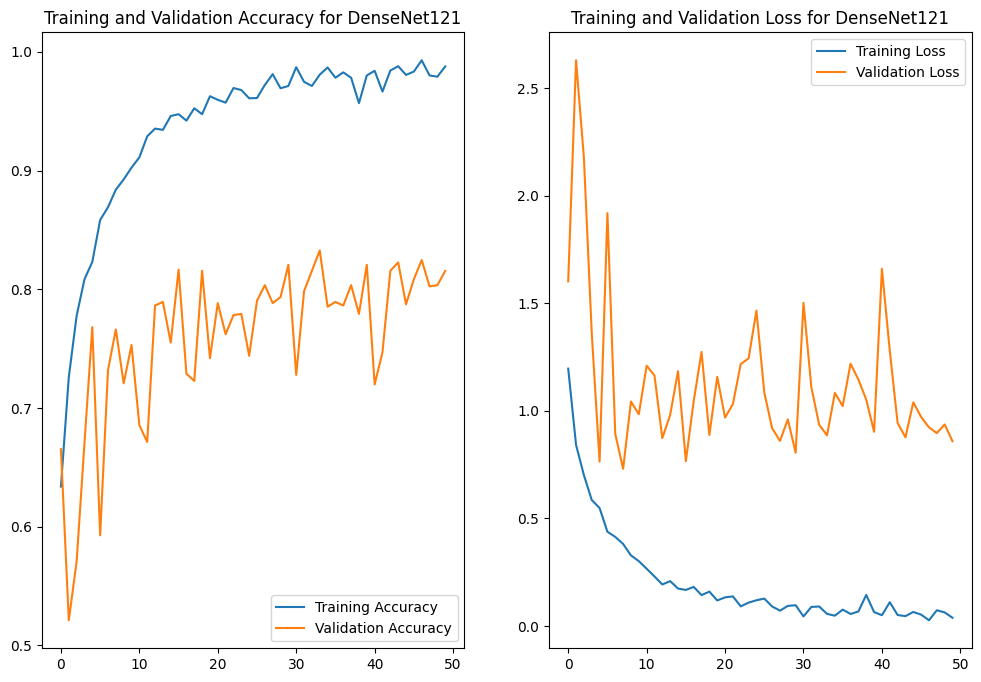

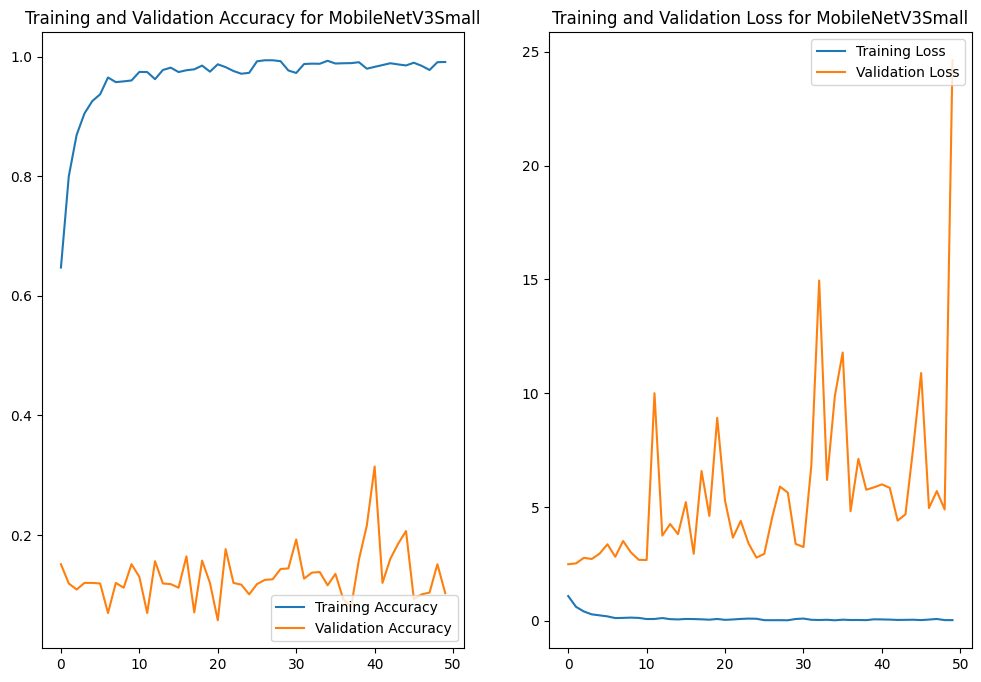

In [ ]:
def plot_training_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'Training and Validation Accuracy for {model_name}')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'Training and Validation Loss for {model_name}')

    plt.show()

# Plot for ResNet50
plot_training_history(resnet_history, 'ResNet50')

# Plot for DenseNet121
plot_training_history(densenet_history, 'DenseNet121')

# Plot for MobileNetV3Small
plot_training_history(mobilenet_history, 'MobileNetV3Small')


# Accuracy and Loss Trends Analysis



---



> ResNet50

* Training Accuracy
Approaches 1.0 quickly and maintains it, indicating the model fits the training data very well.

* Validation Accuracy
Peaks around 0.75 and shows fluctuation, suggesting some instability in generalizing to validation data.

* Training Loss
Decreases steadily and approaches 0, indicating good fit to training data.

* Validation Loss
Fluctuates around 1.0 to 1.5, suggesting overfitting or noise in validation performance.




---



> DenseNet121

* Training Accuracy
Increases steadily towards 1.0, similar to ResNet50, but with slightly less fluctuation.

* Validation Accuracy
Peaks slightly above 0.8 and remains relatively stable, indicating better generalization compared to ResNet50.

* Training Loss
Decreases steadily and approaches 0, similar to ResNet50.

* Validation Loss
Fluctuates between 1.0 and 1.5 but shows a decreasing trend, indicating slightly better performance than ResNet50.




---


> MobileNetV3Small

* Training Accuracy
Quickly reaches and maintains near 1.0, similar to the other models.

* Validation Accuracy
Peaks around 0.38 with significant fluctuation, indicating instability and poorer generalization.

* Training Loss
Decreases quickly and stays low, similar to the other models.

* Validation Loss
Fluctuates significantly and is much higher (up to 25), indicating severe overfitting or poor validation performance.









Conclusion

In [ ]:
print("ResNet50 - Accuracy: ", resnet_history.history['val_accuracy'][-1], " mAP: ", resnet_map, " Training Time: ", resnet_training_time)
print("DenseNet121 - Accuracy: ", densenet_history.history['val_accuracy'][-1], " mAP: ", densenet_map, " Training Time: ", densenet_training_time)
print("MobileNetV3Small - Accuracy: ", mobilenet_history.history['val_accuracy'][-1], " mAP: ", mobilenet_map, " Training Time: ", mobilenet_training_time)


ResNet50 - Accuracy:  0.7207661271095276  mAP:  0.09987129780588663  Training Time:  2700.3450672626495
DenseNet121 - Accuracy:  0.8155242204666138  mAP:  0.1005891072615589  Training Time:  2699.344372034073
MobileNetV3Small - Accuracy:  0.10282257944345474  mAP:  0.09947849512342863  Training Time:  2007.6289284229279


# Insights upon Results Summary

DenseNet121: Highest accuracy and mAP, slightly longer training time but best performance overall.

ResNet50: Moderate accuracy, slightly less mAP, longer training time, signs of potential overfitting.

MobileNetV3Small: Lowest accuracy, similar mAP, fastest training time, not suitable for high-accuracy tasks.

# Conclusion

DenseNet121:
Best model with 81.55% accuracy and 0.1006 mAP. Reliable and well-generalized.

ResNet50:
Close second with 72.08% accuracy and 0.0999 mAP. Shows signs of overfitting.

MobileNetV3Small:
Poor performance with 10.28% accuracy and similar mAP. Fastest training but not practical.